In [ ]:
!git clone https://github.com/morcoslab/LGL-VAE.git
!cd LGL-VAE/
!mkdir all
#Generate the MSA data from https://gremlin.bakerlab.org save it in all folder and train the moldel
!python run_vae.py all/all.fasta  all/ all/

2023-07-14 12:55:53.661234: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


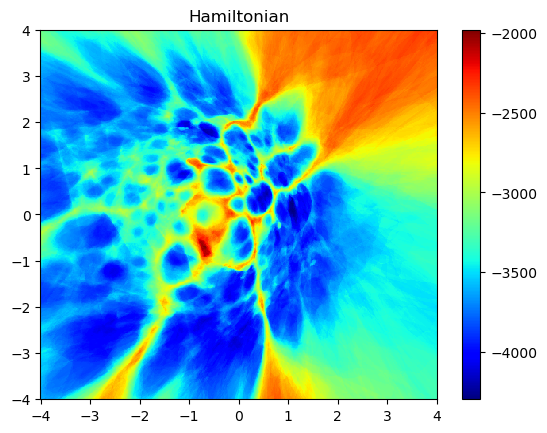

Time Elapsed - 571.6072397232056


In [1]:
from hamiltonian_map import *
from tensorflow.python.keras.models import load_model
import tensorflow as tf
from model.generator import read_fasta_as_one_hot_encoded

In [2]:
loaded = load_model(model,compile=True)
ds = tf.data.Dataset.from_generator(lambda: read_fasta_as_one_hot_encoded(full_alignment),tf.int8).batch(1000)
_,_,zed = loaded.encoder.predict(ds)

In [3]:
mfdcamodel = dca(full_alignment)
mfdcamodel.mean_field()
grid_hamiltonians, _ = mfdcamodel.compute_Hamiltonian("/Users/divyanshushukla/Downloads/sequence.fasta")

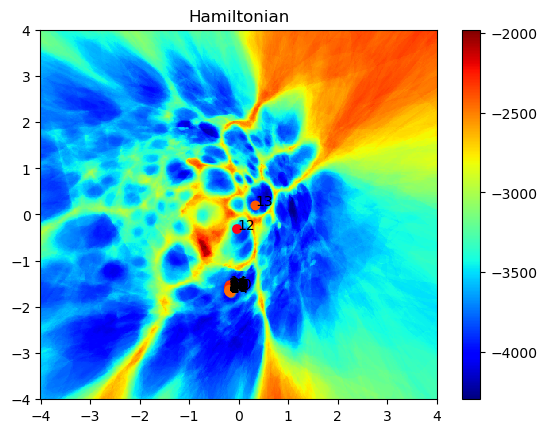

In [ ]:
resolution=figure_resolution
a, b = np.meshgrid(np.linspace(resolution[0], resolution[1], resolution[2]),
                       np.linspace(resolution[0], resolution[1], resolution[2]))

fig, ax = plt.subplots()
c = ax.pcolormesh(b, a, hamil_mat, cmap='jet')
ax.scatter(x=zed[:,0],y=zed[:,1])
ax.set_title("Hamiltonian")
fig.colorbar(c, ax=ax)
plt.scatter(x=zed[:,0],y=zed[:,1], c=grid_hamiltonians, cmap='hsv')
for i, txt in enumerate(zed):
    plt.annotate(i, (zed[:,0][i], zed[:,1][i]))
plt.show()